In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
running_on_kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', 'Localhost') != 'Localhost'

if running_on_kaggle:
    print('Kaggle environment detected')
    # !nvidia-smi
    data_dir = '/kaggle/input/food41/images/'
else:
    print('Running on localhost')
    data_dir = './dataset/food/images/'
    !pip install --quiet -r requirements.txt
    !python download_data.py

Kaggle environment detected


In [3]:
batch_size = 32

img_height = 224
img_width = 224

In [4]:
train_data_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.2)

test_data_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2)

In [5]:
train_data = train_data_generator.flow_from_directory(
    data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

val_data = test_data_generator.flow_from_directory(
    data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode='categorical',
    subset = 'validation')

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


# InceptionV3

In [6]:
InceptionV3 = tf.keras.applications.inception_v3.InceptionV3(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    classes=101)

# for layer in InceptionV3.layers:
#     layer.trainable = False

x = InceptionV3.output
x = layers.BatchNormalization()(x)
x = layers.AveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(101, activation='softmax')(x)
model = models.Model(InceptionV3.input, output)

model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

2022-03-27 07:51:30.466059: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-27 07:51:30.580362: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-27 07:51:30.581524: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-27 07:51:30.583127: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

87924736/87910968 [==============================] - 1s 0us/step


In [7]:
epochs=15
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

2022-03-27 07:51:36.378650: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-03-27 07:51:44.176743: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2525/2525 [==============================] - 1712s 673ms/step - loss: 4.6318 - accuracy: 0.0089 - val_loss: 4.6152 - val_accuracy: 0.0099
Epoch 2/15
2525/2525 [==============================] - 1411s 559ms/step - loss: 4.6176 - accuracy: 0.0087 - val_loss: 4.6152 - val_accuracy: 0.0099
Epoch 3/15
2525/2525 [==============================] - 1433s 568ms/step - loss: 4.6158 - accuracy: 0.0096 - val_loss: 4.6152 - val_accuracy: 0.0099
Epoch 4/15
2525/2525 [==============================] - 1455s 576ms/step - loss: 4.6198 - accuracy: 0.0094 - val_loss: 4.6157 - val_accuracy: 0.0099
Epoch 5/15
2525/2525 [==============================] - 1456s 576ms/step - loss: 4.6159 - accuracy: 0.0093 - val_loss: 4.6153 - val_accuracy: 0.0099
Epoch 6/15
2525/2525 [==============================] - 1439s 570ms/step - loss: 4.6196 - accuracy: 0.0090 - val_loss: 4.6360 - val_accuracy: 0.0099
Epoch 7/15
2525/2525 [==============================] - 1438s 569ms/step - loss: 4.6159 - accuracy: 0.0091 - val_loss

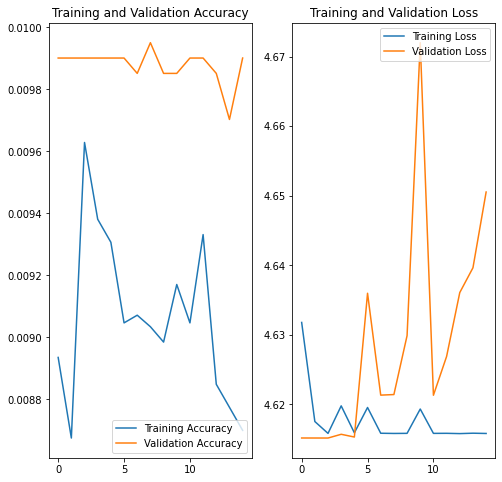

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
model.save('/kaggle/working/model')

2022-03-27 13:59:35.203185: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
